##Part 1

In [2]:
%pip install matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install sounddevice scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import time 
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [ ]:
fs = 44100  # Sample rate
duration = 3 
total_samples = fs * duration
print(f"Sampling frequency: fs = {fs} Hz")
print(f"Sampling period: Ts = {1/fs*1000:.4f} seconds")
print(f"Duration: {duration} seconds")
print(f"Total samples to record: {total_samples}")

Sampling frequency: fs = 44100 Hz
Sampling period: Ts = 0.0227 seconds
Duration: 3 seconds
Total samples to record: 132300


In [82]:
print("Get ready to say 'Ahhh'...")
for i in range(3, 0, -1):
    print(f"{i}...")
    time.sleep(1)
print(f"Recording for {duration} seconds...")
# Record audio
my_recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait() # Wait until recording finishes
print("Recording complete")
#playback 
print("Playing back....")
sd.play(my_recording, fs)
sd.wait()
print("Playback complete!")

Get ready to say 'Ahhh'...
3...
2...
1...
Recording for 3 seconds...
Recording complete
Playing back....
Playback complete!


Part 2 

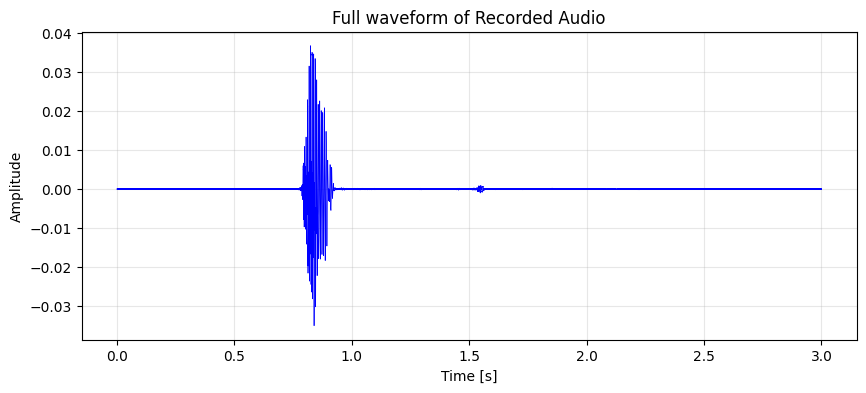

Number of samples recorded: 132300 
Time axis range from t = 0 to t = 3.0000 seconds


In [83]:
#t = n * Ts = n / fs
t = np.arange(len(my_recording)) / fs

plt.figure(figsize=(10, 4))
plt.plot(t, my_recording, color ='blue', linewidth=0.5)
plt.title("Full waveform of Recorded Audio")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Number of samples recorded: {len(my_recording)} ")
print(f"Time axis range from t = 0 to t = {t[-1]:.4f} seconds")

Total samples to record: 132300


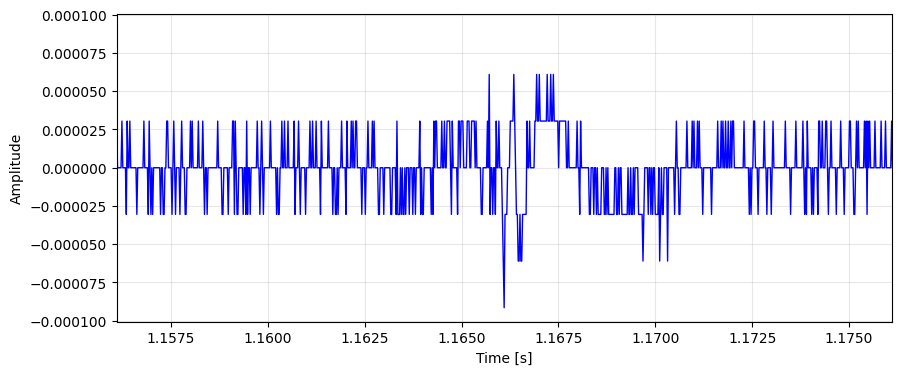

In [79]:
peak_idx = np.argmax(np.abs(my_recording))
peak_time = peak_idx / fs

zoom_s = peak_time - 0.010  #10ms before peak
zoom_e = peak_time + 0.010  #10ms after peak

#plot 
plt.figure(figsize=(10, 4))
plt.plot(t, my_recording, color='blue', linewidth=1)
plt.xlim(zoom_s, zoom_e)
plt.title(print(f"Total samples to record: {total_samples}"))
plt.xlabel("Time [s]") 
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.show() 

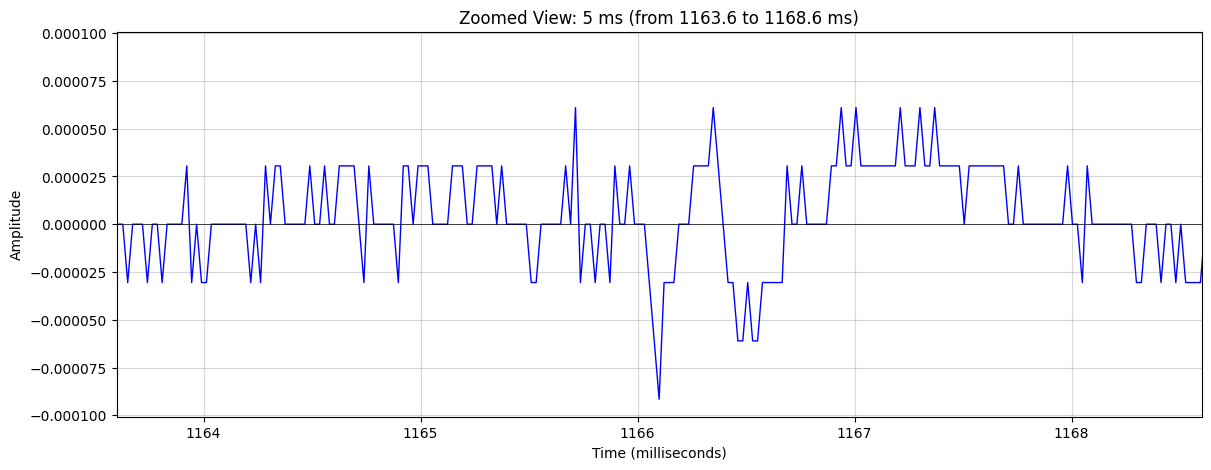

In [80]:
t_ms = t * 1000  #time in milliseconds
peak_time_ms = peak_time * 1000  #peak time in milliseconds

start_ms = peak_time_ms - 2.5  #10ms before peak
end_ms = peak_time_ms + 2.5  #10ms after peak

#plot 
plt.figure(figsize=(14, 5))
plt.plot(t_ms, my_recording, 'b-', linewidth=1)
plt.xlim(start_ms, end_ms)
plt.title(f"Zoomed View: 5 ms (from {start_ms:.1f} to {end_ms:.1f} ms)")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

In [66]:
target_start = 1056
target_end = target_start +  2.0 

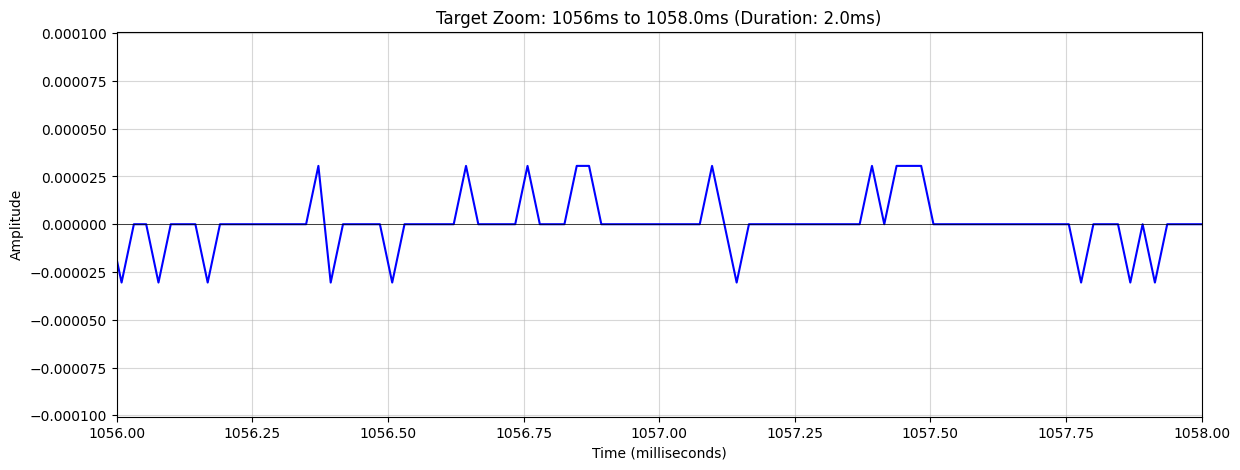

In [81]:
# Plot the selected 2 ms segment
plt.figure(figsize=(14, 5))
plt.plot(t_ms, my_recording, 'b-', linewidth=1.5)
plt.xlim(target_start, target_end)
plt.title(f"Target Zoom: {target_start}ms to {target_end}ms (Duration: 2.0ms)")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

Part 3

In [68]:
# Find indices for the selected 2 ms segment
idx_start = int((target_start/1000) * fs)
idx_end = int((target_end/1000) * fs)

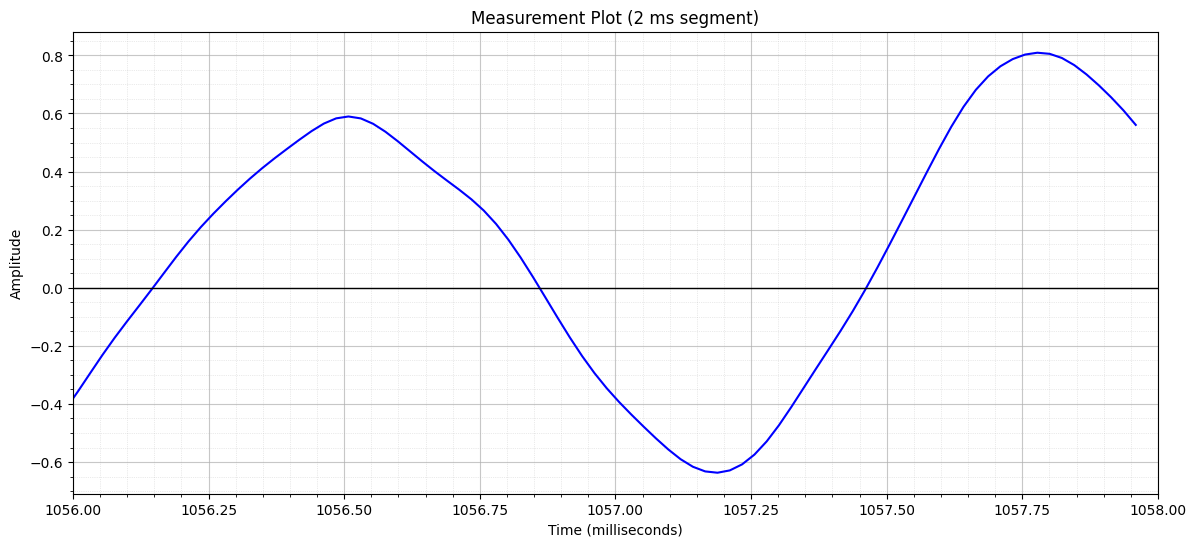

In [69]:
# Plot with dense grid
plt.figure(figsize=(14, 6))
plt.plot(t_ms[idx_start:idx_end], my_recording[idx_start:idx_end],
'b-', linewidth=1.5)
plt.xlim(target_start, target_end)
plt.title("Measurement Plot (2 ms segment)")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
# Dense grid for easier measurement
plt.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.7)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=1)
plt.show()

Part 4

In [17]:
A_measured = ____ # Amplitude from Step 3.2
f_measured = ____ # Frequency from Step 3.4 (in Hz)
# Create time axis (same range as your 2 ms segment)
t_cos = np.linspace(target_start/1000, target_end/1000, 1000)
# Generate pure cosine: x(t) = A * cos(2*pi*f*t)
x_cos = A_measured * np.cos(2 * np.pi * f_measured * t_cos)
print(f"Pure cosine: x(t) = {A_measured} * cos(2*pi*{f_measured}*t)")
print(f"Phase phi = 0 (not yet determined)")

NameError: name '____' is not defined

In [ ]:
voice_segment = my_recording[idx_start:idx_end].flatten()
t_voice_ms = t_ms[idx_start:idx_end]
# Calculate DC offset (mean value)
DC_offset = np.mean(voice_segment)
print(f"DC offset = {DC_offset:.4f}")
# Remove DC offset
voice_centered = voice_segment - DC_offset
print(f"After removing DC: mean = {np.mean(voice_centered):.6f} (approximately zero)")


In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(t_voice_ms, voice_centered, 'gray', linewidth=2,
label='Your voice (DC removed)')
plt.plot(t_cos*1000, x_cos, 'r--', linewidth=2,
label='Pure cosine: A*cos(2*pi*f*t)')
plt.xlim(target_start, target_end)
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.title("Comparison: Voice (centered) vs. Pure Cosine (phi = 0)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

Part 5

In [ ]:
# Enter your calculated phase
phi_measured = ____ # Phase from Step 5.2 (in radians)
# Generate phase-corrected cosine: x(t) = A * cos(2*pi*f*t + phi)
x_cos_corrected = A_measured * np.cos(2 * np.pi * f_measured * t_cos + phi_measured)
print(f"Phase-corrected cosine:")
print(f"x(t) = {A_measured} * cos(2*pi*{f_measured}*t + {phi_measured:.4f})")

In [ ]:

plt.figure(figsize=(14, 6))
# Your voice (DC removed)
plt.plot(t_voice_ms, voice_centered, 'gray', linewidth=2.5,
label='Your voice (DC removed)')
# Phase-corrected cosine
plt.plot(t_cos*1000, x_cos_corrected, 'r-', linewidth=2,
label=f'Cosine with phi = {phi_measured:.2f} rad')
plt.xlim(target_start, target_end)
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.title("Final Result: Voice vs. Phase-Corrected Cosine (In Phase)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()
print("")
print("Your voice can be approximated by:")
print(f"x(t) = {A_measured:.4f} * cos(2*pi*{f_measured:.1f}*t + {phi_measured:.4f})")